# Simplest NN

In [15]:
import dlc_bci as bci
import torch
from torch.autograd import Variable
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_input , train_target = bci.load(root = './data_bci', train=True, one_khz=True)
print(str(type(train_input)), train_input.size())
print(str(type(train_target)), train_target.size())

<class 'torch.FloatTensor'> torch.Size([316, 28, 500])
<class 'torch.LongTensor'> torch.Size([316])


In [3]:
test_input, test_target = bci.load(root = './data_bci', train=False, one_khz=True)
print(str(type(test_input)), test_input.size())
print(str(type(test_target)), test_target.size())

<class 'torch.FloatTensor'> torch.Size([100, 28, 500])
<class 'torch.LongTensor'> torch.Size([100])


In [4]:
train_input = train_input.view(train_input.shape[0], -1)
test_input = test_input.view(test_input.shape[0], -1)

In [5]:
train_input.shape, test_input.shape

(torch.Size([316, 14000]), torch.Size([100, 14000]))

In [6]:
def one_hot(batch,depth):
    ones = torch.sparse.torch.eye(depth)
    return ones.index_select(0,batch)

In [7]:
train_target_1h = one_hot(train_target, 2)
test_target_1h = one_hot(test_target, 2)

In [8]:
train_target_1h.shape, test_target_1h.shape

(torch.Size([316, 2]), torch.Size([100, 2]))

In [9]:
train_input_var = Variable(train_input)
train_target_var = Variable(train_target, requires_grad=False)

test_input_var = Variable(test_input)
test_target_var = Variable(test_target, requires_grad=False)

In [40]:
D_in = train_input.shape[1]
H = 256
D_out = 2

model = torch.nn.Sequential(
          torch.nn.Linear(D_in, H),
          torch.nn.ReLU(),
          torch.nn.Linear(H, H),
          torch.nn.ReLU(),
          torch.nn.Linear(H, H),
          torch.nn.ReLU(),
          torch.nn.Linear(H, H),
          torch.nn.ReLU(),
          torch.nn.Linear(H, H),
          torch.nn.ReLU(),
          torch.nn.Linear(H, D_out),
        )

In [43]:
loss_fn = torch.nn.CrossEntropyLoss()
learning_rate = 1e-5
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.01)

accs_train = []
accs_test = []

for t in range(300):
    y_pred = model(train_input_var)
    loss = loss_fn(y_pred, train_target_var)
    print(t, loss.data[0])
    model.zero_grad()
    loss.backward()
    optimizer.step()
    
    pred_test = model(train_input_var).data
    pred_train_classes = pred_test.max(1)[1]
    accs_train.append(accuracy_score(pred_train_classes, train_target))
    
    pred_test = model(test_input_var).data
    pred_test_classes = pred_test.max(1)[1]
    accs_test.append(accuracy_score(pred_test_classes, test_target))

0 0.12037284672260284
1 0.4745102822780609
2 0.12449498474597931
3 0.30021047592163086
4 0.31519466638565063
5 0.17548403143882751
6 0.12319707125425339
7 0.1772550493478775
8 0.22699449956417084
9 0.20282958447933197
10 0.14754989743232727
11 0.12301799654960632
12 0.14113709330558777
13 0.16966451704502106
14 0.17070871591567993
15 0.1448630690574646
16 0.12144896388053894
17 0.12001422792673111
18 0.13478924334049225
19 0.14411453902721405
20 0.1353822946548462
21 0.11888439953327179
22 0.11156218498945236
23 0.11713771522045135
24 0.12537014484405518
25 0.1241891011595726
26 0.11445864289999008
27 0.10705383121967316
28 0.10833767801523209
29 0.11374012380838394
30 0.11458516120910645
31 0.1090211272239685
32 0.10337010025978088
33 0.10304351896047592
34 0.1062377467751503
35 0.10706699639558792
36 0.10352300107479095
37 0.09956783056259155
38 0.09896817058324814
39 0.1006557047367096
40 0.10082729905843735
41 0.09834457188844681
42 0.09582074731588364
43 0.09548234194517136
44 0.0

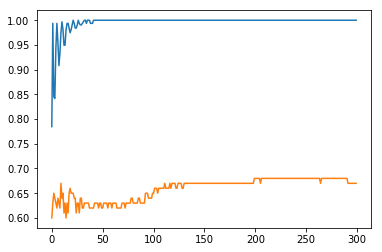

In [44]:
plt.plot(accs_train)
plt.plot(accs_test)

In [45]:
pred_test = model(test_input_var).data
pred_test_classes = pred_test.max(1)[1]
accuracy_score(pred_test_classes, test_target)

0.67000000000000004

In [46]:
pred_train = model(train_input_var).data
pred_train_classes = pred_train.max(1)[1]
accuracy_score(pred_train_classes, train_target)

1.0